In [1]:
import zipfile
import os

from PIL import Image
import numpy as np

from image_operations import *

# Fluoroscopy images

In [2]:
files = [os.getcwd()+"/EDX/"+x for x in os.listdir("./EDX/") if ".docx" in x]
images = []

0


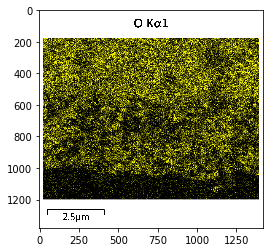

1


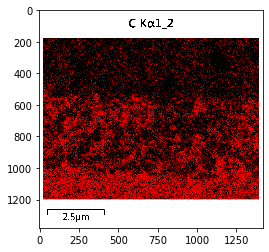

2


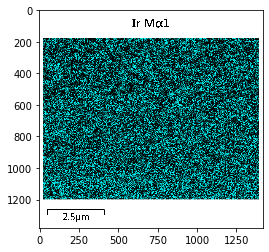

3


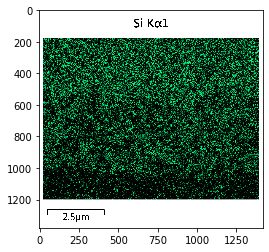

4


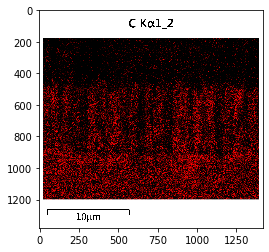

5


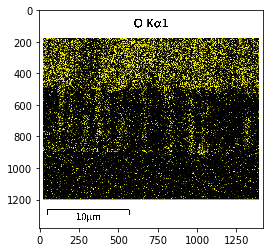

6


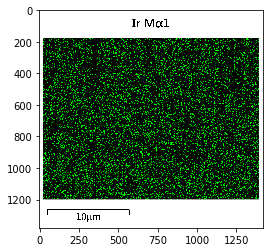

7


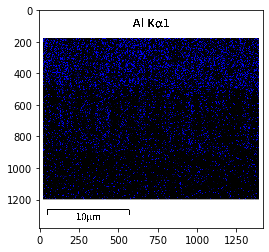

8


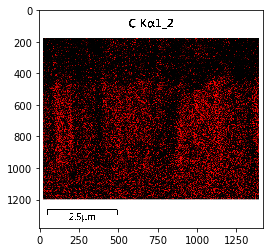

9


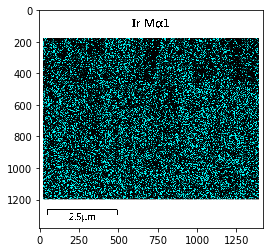

10


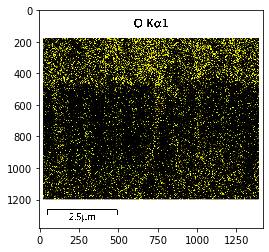

11


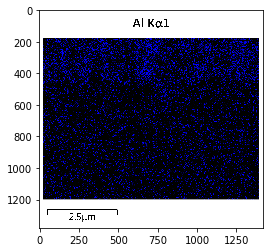

12


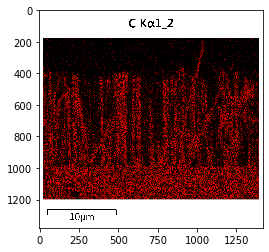

13


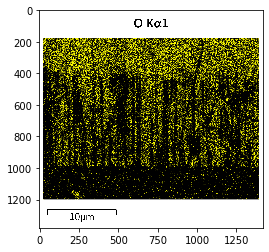

14


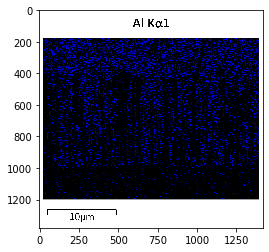

15


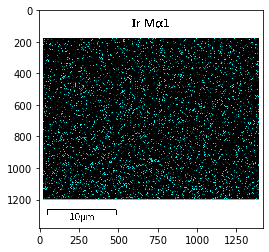

16


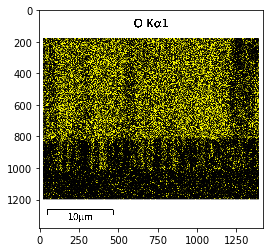

17


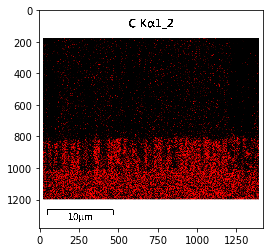

18


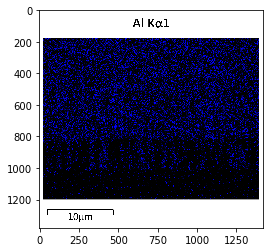

19


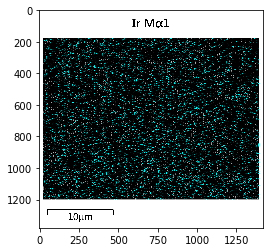

20


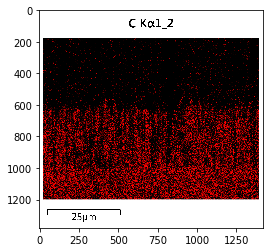

21


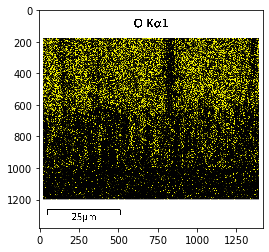

22


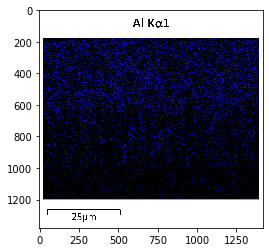

23


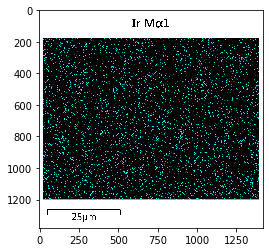

24


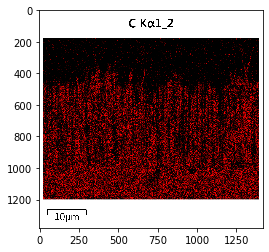

25


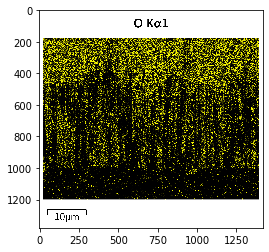

26


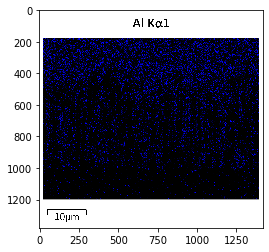

27


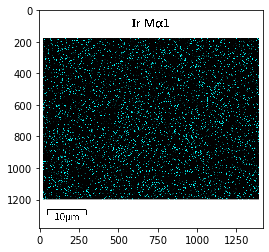

In [4]:
import matplotlib.pyplot as plt
plt.show()

for idx, i in enumerate(images):
    print(idx)
    plt.imshow(i)
    plt.show()
    

In [5]:
idx_red = [1,4,8,12,17,20,24]
red_imgs = [im[:,:,0] for idx,im in enumerate(images) if idx in idx_red]

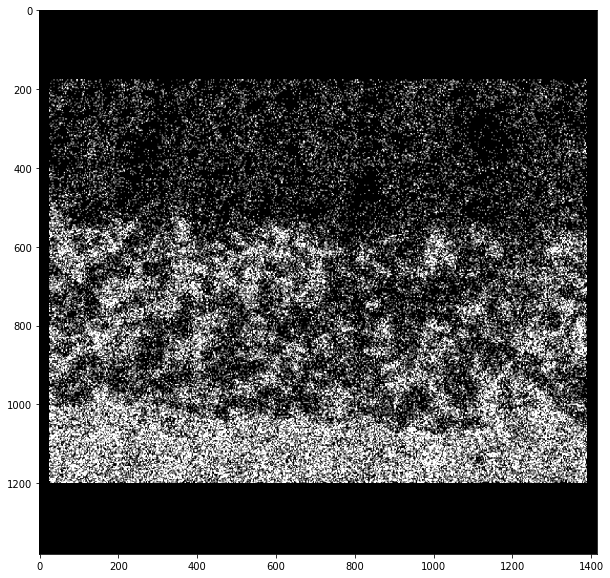

In [6]:
raw = red_imgs[0]
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(raw,cmap="gray")

In [1]:
function_to_default_params = {}
function_to_default_params["crop"] = [200,20,-200,-20]
function_to_default_params["blur columnwise"]=[30,10]
function_to_default_params["blur"] = [20,10]
function_to_default_params["gradient columnwise"] = []
function_to_default_params["sample via threshold"]=["top",0.6,200,0]
function_to_default_params["gaussian filter nan"]=[4]

cascade0 = [["crop",[200,20,-200,-20]],
           ["blur columnwise", [30,10]],
           ["blur", [20,10]],
           ["gradient columnwise",[]],
           ["sample via threshold",["top",0.6,200,0]],
           ["gaussian filter nan",[4]]]

cascade1 = [["crop",[200,20,-200,-20]],
           ["blur columnwise", [30,10]],
           ["blur", [20,10]],
           ["gradient columnwise",[]],
           ["sample via threshold",["bottom",1.0,900,-50]],
           ["gaussian filter nan",[4]]]

plt.imshow(apply_cascade(raw,[["crop",[200,20,-200,-20]]]))
plt.plot(apply_cascade(raw,cascade1),color="red")
plt.plot(apply_cascade(raw,cascade0),color="orange")

NameError: name 'plt' is not defined

# Raster electron microscopic images

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import cv2
from PIL import Image

In [21]:
path = "400_100/PS_24K/10 min/18_04_30/AAO_400_100_24700_10_02.tif"

img = np.asarray(Image.open(path))
img = np.asarray(im[:650],dtype = np.float)

In [22]:
opening = remove_isolated_pixels(np.asarray(horizontal_component(img)>15,dtype=np.float))

Text(0.5, 1.0, 'Sampled points')

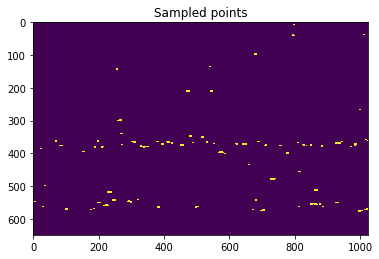

In [23]:
fig, ax = plt.subplots(1)
ax.imshow(opening)
ax.set_title('Sampled points')

In [24]:
coords = np.where(opening)

In [25]:
mask = np.logical_and(coords[0]<400, coords[0]>350)
coords_lower = np.asarray([coords[0][mask],coords[1][mask]])

In [26]:
np.max(coords_lower[1])

1023

In [27]:
def flip_ud(y,image_height):
    return -y+ image_height


/home/eler/miniconda3/lib/python3.7/site-packages/numpy/lib/polynomial.py:626: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/eler/miniconda3/lib/python3.7/site-packages/numpy/core/_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
/home/eler/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  


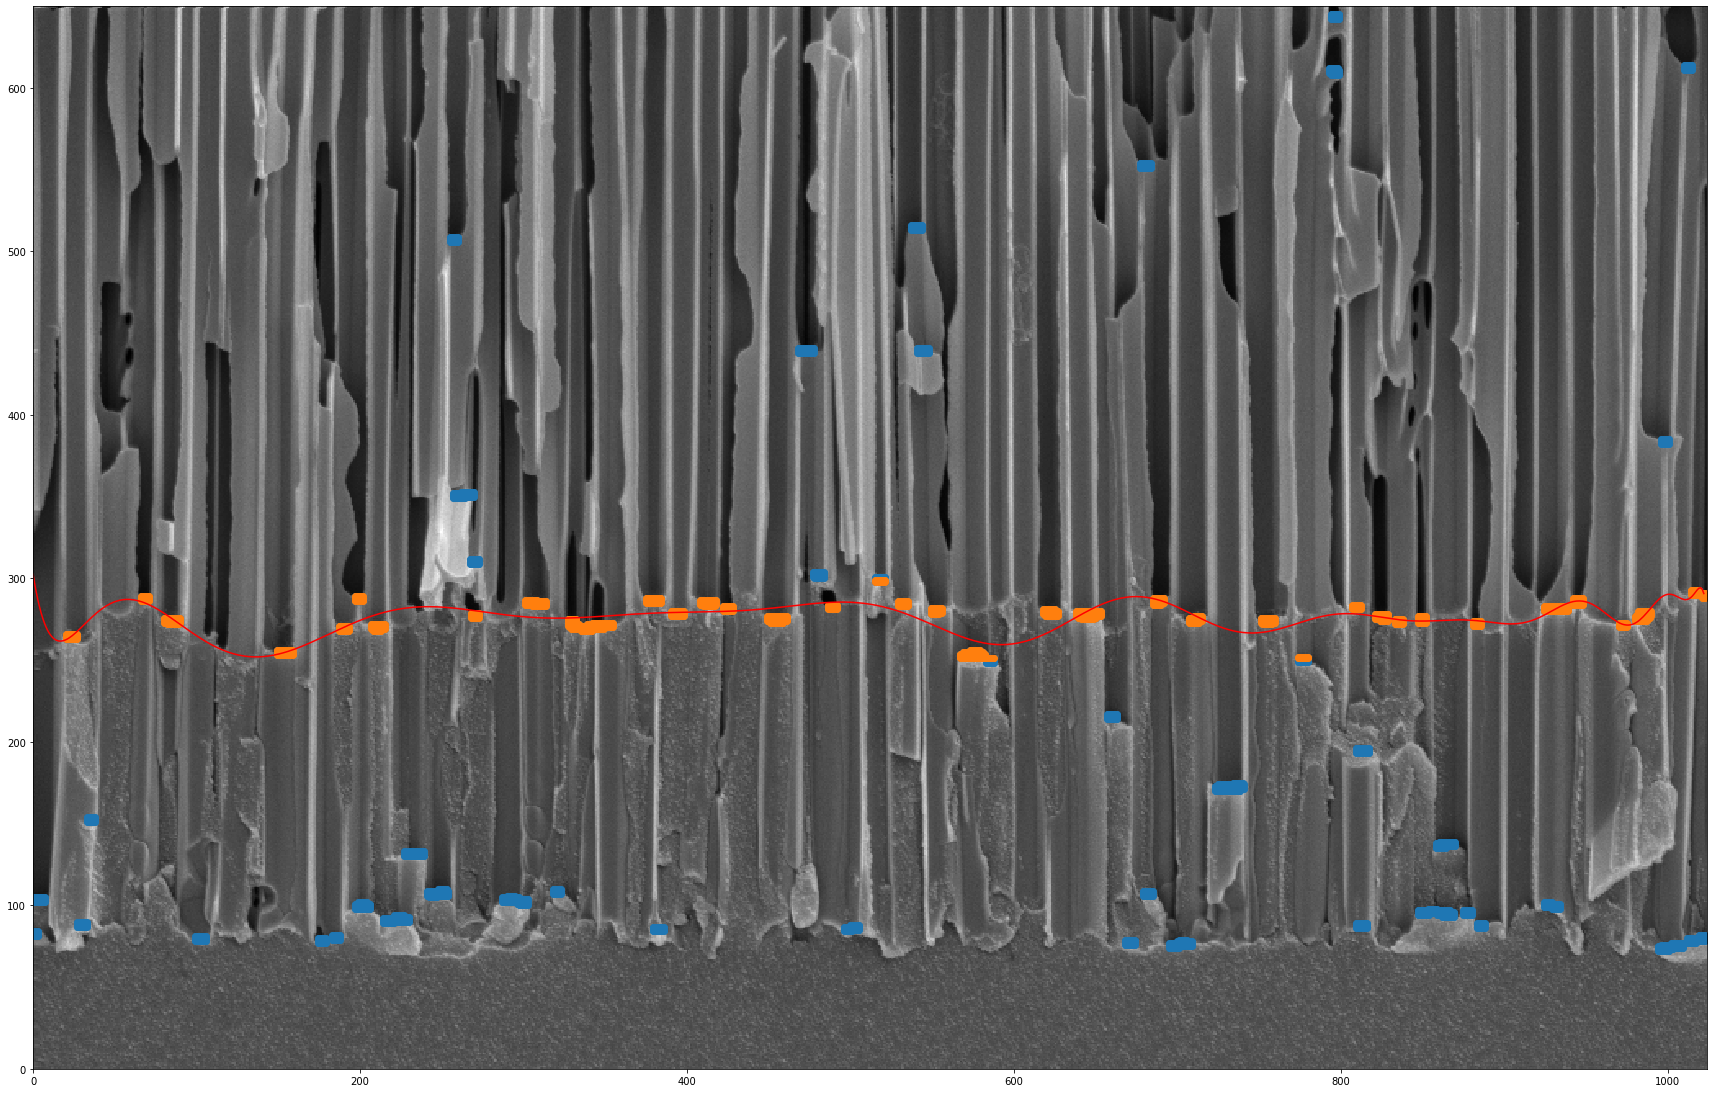

In [28]:
fig, ax = plt.subplots(figsize=(30,30))
ax.scatter(coords[1],flip_ud(coords[0],image_height = img.shape[0]))
ax.scatter(coords_lower[1],flip_ud(coords_lower[0],image_height=img.shape[0]))


f = np.poly1d(np.polyfit(coords_lower[1],coords_lower[0],100))
x = np.arange(np.max(coords_lower[1]))

y = f(x)

ax.plot(x,flip_ud(y, image_height=im.shape[0]), color ="red")

ax.imshow(im,extent=[0,im.shape[1],0,im.shape[0]],cmap ="gray")